In [848]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [849]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint, loguniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from mixed_naive_bayes import MixedNB


In [850]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [851]:
df=pd.read_csv("ravdess_features.csv")
dfcopy = df.copy()

# Filling missing values

### Intensity

In [852]:
df_empty_intensity=df[df["intensity"].isna()]
df_full_intensity=df[df["intensity"].notnull()]
df_empty_intensity.intensity.head()

1    NaN
6    NaN
9    NaN
10   NaN
11   NaN
Name: intensity, dtype: float64

In [853]:
df_full_intensity.intensity.head()

0   -36.793432
2   -32.290737
3   -49.019839
4   -31.214503
5   -36.312244
Name: intensity, dtype: float64

In [854]:
df_full_train_intensity, df_full_test_intensity = train_test_split(df_full_intensity, test_size=0.3, random_state=100)
#qui separiamo in training e set quello senza missing values

In [855]:
x_train_intensity = df_full_train_intensity["mfcc_min"].values.reshape(-1, 1)
y_train_intensity = df_full_train_intensity["intensity"].values

x_test_intensity = df_full_test_intensity["mfcc_min"].values.reshape(-1, 1)
y_test_intensity = df_full_test_intensity["intensity"].values

In [856]:
x_intensity = df_empty_intensity["mfcc_min"].values.reshape(-1, 1)
y_intensity = df_empty_intensity["intensity"]

In [857]:
reg_intensity = LinearRegression()
reg_intensity.fit(x_train_intensity, y_train_intensity)

LinearRegression()

In [858]:
print('Coefficients: \n', reg_intensity.coef_)
print('Intercept: \n', reg_intensity.intercept_)

Coefficients: 
 [0.08286182]
Intercept: 
 25.320470378436056


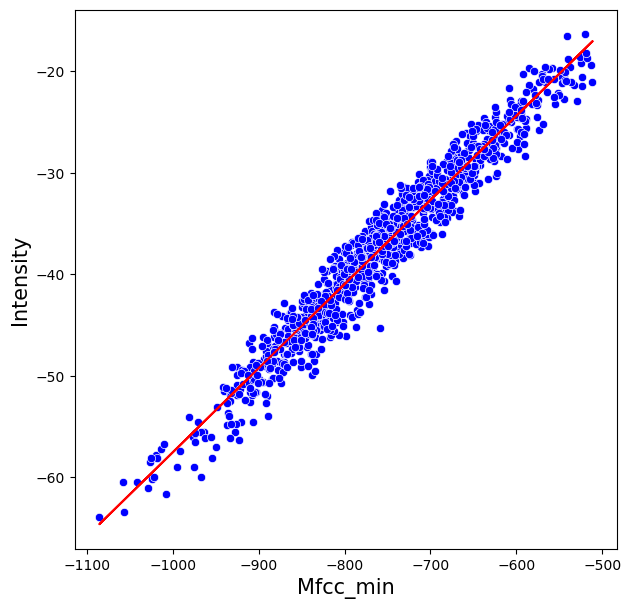

In [859]:
fig = plt.figure(figsize = (7,7))
sns.scatterplot(data=df_full_train_intensity, x="mfcc_min", y="intensity", color = "blue")
plt.plot(x_train_intensity, reg_intensity.coef_[0]*x_train_intensity+reg_intensity.intercept_, c="red")
plt.xlabel("Mfcc_min", fontsize = 15)
plt.ylabel("Intensity", fontsize = 15)
plt.show()

In [860]:
y_pred_intensity = reg_intensity.predict(x_test_intensity)

print('R2: %.3f' % r2_score(y_test_intensity, y_pred_intensity))
print('MSE: %.3f' % mean_squared_error(y_test_intensity, y_pred_intensity))
print('MAE: %.3f' % mean_absolute_error(y_test_intensity, y_pred_intensity))

R2: 0.950
MSE: 3.518
MAE: 1.518


In [861]:
y_intensity = reg_intensity.predict(x_intensity)

In [862]:
y_intensity

array([-33.84167448, -38.2505861 , -28.20214886, -35.82159133,
       -47.82698772, -55.32687385, -24.66837406, -29.68245867,
       -37.1900874 , -36.60768814, -33.24839547, -33.02926407,
       -24.77275509, -42.43320208, -39.38377615, -43.49705668,
       -42.03848981, -35.6340419 , -38.77368447, -32.01388944,
       -36.15228456, -32.03433642, -26.46742842, -34.42773955,
       -40.54460724, -35.01011975, -41.5582368 , -43.71217839,
       -45.01180054, -47.13735864, -36.03070142, -36.15833016,
       -38.53709326, -34.59395207, -44.35818652, -33.66521195,
       -51.86748824, -46.09654792, -32.6694532 , -41.27366695,
       -25.02516462, -22.21703975, -23.64013347, -46.58176435,
       -44.63304249, -54.23866865, -46.79971331, -48.07508098,
       -37.97333542, -23.88696225, -36.93410819, -40.97270122,
       -35.4405927 , -50.61308046, -37.67756845, -39.9508062 ,
       -44.08749934, -54.68057653, -22.42573552, -28.18123206,
       -38.7499777 , -25.00744793, -27.42912268, -33.17

In [863]:
df.iloc[1]["intensity"]

nan

In [864]:
na = df["intensity"].isna()
df.loc[na, "intensity"] = y_intensity

In [865]:
df["intensity"]

0      -36.793432
1      -33.841674
2      -32.290737
3      -49.019839
4      -31.214503
          ...    
2447   -45.602965
2448   -43.342901
2449   -38.347680
2450   -45.751265
2451   -40.018044
Name: intensity, Length: 2452, dtype: float64

### Frame count

In [866]:
df_empty_fc=df[df["frame_count"] == -1]
df_full_fc=df[df["frame_count"] != -1]

In [867]:
df_full_train_fc, df_full_test_fc = train_test_split(df_full_fc, test_size=0.3, random_state=100)

In [868]:
x_train_fc = df_full_train_fc["length_ms"].values.reshape(-1, 1)
y_train_fc = df_full_train_fc["frame_count"].values

x_test_fc = df_full_test_fc["length_ms"].values.reshape(-1, 1)
y_test_fc = df_full_test_fc["frame_count"].values

x_fc = df_empty_fc["length_ms"].values.reshape(-1, 1)
y_fc = df_empty_fc["frame_count"]

In [869]:
reg_fc = LinearRegression()
reg_fc.fit(x_train_fc, y_train_fc)
print('Coefficients: \n', reg_fc.coef_)
print('Intercept: \n', reg_fc.intercept_)

Coefficients: 
 [48.00189796]
Intercept: 
 -7.764321357855806


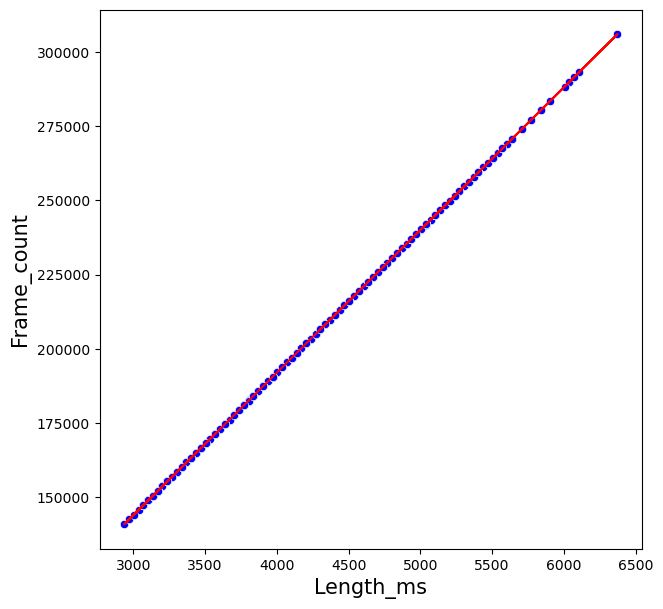

In [870]:
fig = plt.figure(figsize = (7,7))
sns.scatterplot(data=df_full_train_fc, x="length_ms", y="frame_count", color = "blue")
plt.plot(x_train_fc, reg_fc.coef_[0]*x_train_fc+reg_fc.intercept_, c="red")
plt.xlabel("Length_ms", fontsize = 15)
plt.ylabel("Frame_count", fontsize = 15)
plt.show()

In [871]:
y_pred_fc = reg_fc.predict(x_test_fc)

print('R2: %.3f' % r2_score(y_test_fc, y_pred_fc))
print('MSE: %.3f' % mean_squared_error(y_test_fc, y_pred_fc))
print('MAE: %.3f' % mean_absolute_error(y_test_fc, y_pred_fc))

R2: 1.000
MSE: 195.090
MAE: 12.147


In [872]:
y_fc = reg_fc.predict(x_fc)

In [873]:
na = df["frame_count"] == -1
df.loc[na, "intensity"] = y_fc

# Preparation

In [874]:
df["emotion"].unique()

array(['fearful', 'angry', 'happy', 'surprised', 'neutral', 'calm', 'sad',
       'disgust'], dtype=object)

In [875]:
df["emotion"]=df["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df["emotional_intensity"]=df["emotional_intensity"].replace(["normal", "strong"],[0,1])
df["repetition"]=df["repetition"].replace(["1st", "2nd"],[0,1])
df["sex"]=df["sex"].replace(["M", "F"],[0,1])
df["statement"]=df["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df["vocal_channel"]=df["vocal_channel"].replace(["speech", "song"],[0,1])

In [876]:
df=df.drop(columns=["modality", "repetition", "actor", "channels","sample_width", "frame_rate", "frame_width", "sc_min", "stft_min", "stft_max"])
#df1 = df.drop(["mfcc_min", "stft_mean", "min", "max", "intensity", "vocal_channel", "emotional_intensity", "statement", "sex"], axis=1)
#df2 = df.drop(columns=["length_ms", "std", "sc_skew", "mfcc_mean", "sc_mean", "sc_std"])

In [877]:
df

,vocal_channel,emotion,emotional_intensity,statement,sex,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,...,stft_mean,stft_std,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,0.0,0,0,0,1,3737,179379.0,-36.793432,16995,-33.485947,...,0.415250,0.335533,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,0.0,1,0,0,1,3904,187387.0,-33.841674,13906,-29.502108,...,0.417488,0.352380,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,NaN,2,1,0,1,4671,224224.0,-32.290737,18723,-30.532463,...,0.379758,0.352270,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,NaN,3,0,1,1,3637,174575.0,-49.019839,11617,-36.059555,...,0.407277,0.360552,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,1.0,2,1,0,1,4404,211411.0,-31.214503,15137,-31.405996,...,0.415974,0.350655,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0.0,5,1,1,0,4605,221021.0,-45.602965,9871,-30.225578,...,0.573838,0.304496,-1.075888,-0.310088,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247
2448,0.0,5,0,0,0,4171,200200.0,-43.342901,8963,-31.160332,...,0.591010,0.306333,-1.026071,-0.408018,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633
2449,1.0,6,1,0,0,5239,251451.0,-38.347680,9765,-26.135280,...,0.467994,0.347843,-1.473789,0.130310,-8.219263e-06,0.015384,-0.093079,0.097260,4.964319,-0.005821
2450,0.0,3,0,1,0,3737,179379.0,-45.751265,9716,-28.242815,...,0.578854,0.308684,-1.277117,-0.242668,-4.400898e-06,0.005182,-0.057556,0.052002,13.855588,-0.110966


### vocal channel missing Values 

### Partitioning vocal channel

In [878]:
#split the datset in two
df_full_VC = df[df["vocal_channel"].notna()]
print("N. rows with VC not null:", df_full_VC.shape[0])

df_empty_VC = df[df["vocal_channel"].isna()]
print("N. rows with VC null:", df_empty_VC.shape[0])

N. rows with VC not null: 2256
N. rows with VC null: 196


In [879]:
X_VC = df_full_VC.drop("vocal_channel", axis=1).values
Y_VC = df_full_VC["vocal_channel"].values

In [880]:
X_train_VC, X_test_VC, Y_train_VC, Y_test_VC = train_test_split(X_VC, Y_VC, test_size=0.3, random_state=0)

In [881]:
#no parameters
dt = DecisionTreeClassifier(max_depth= 100, min_samples_leaf= 0.005, min_samples_split= 0.002)

In [882]:
dt.fit(X_train_VC, Y_train_VC)

DecisionTreeClassifier(max_depth=100, min_samples_leaf=0.005,
                       min_samples_split=0.002)

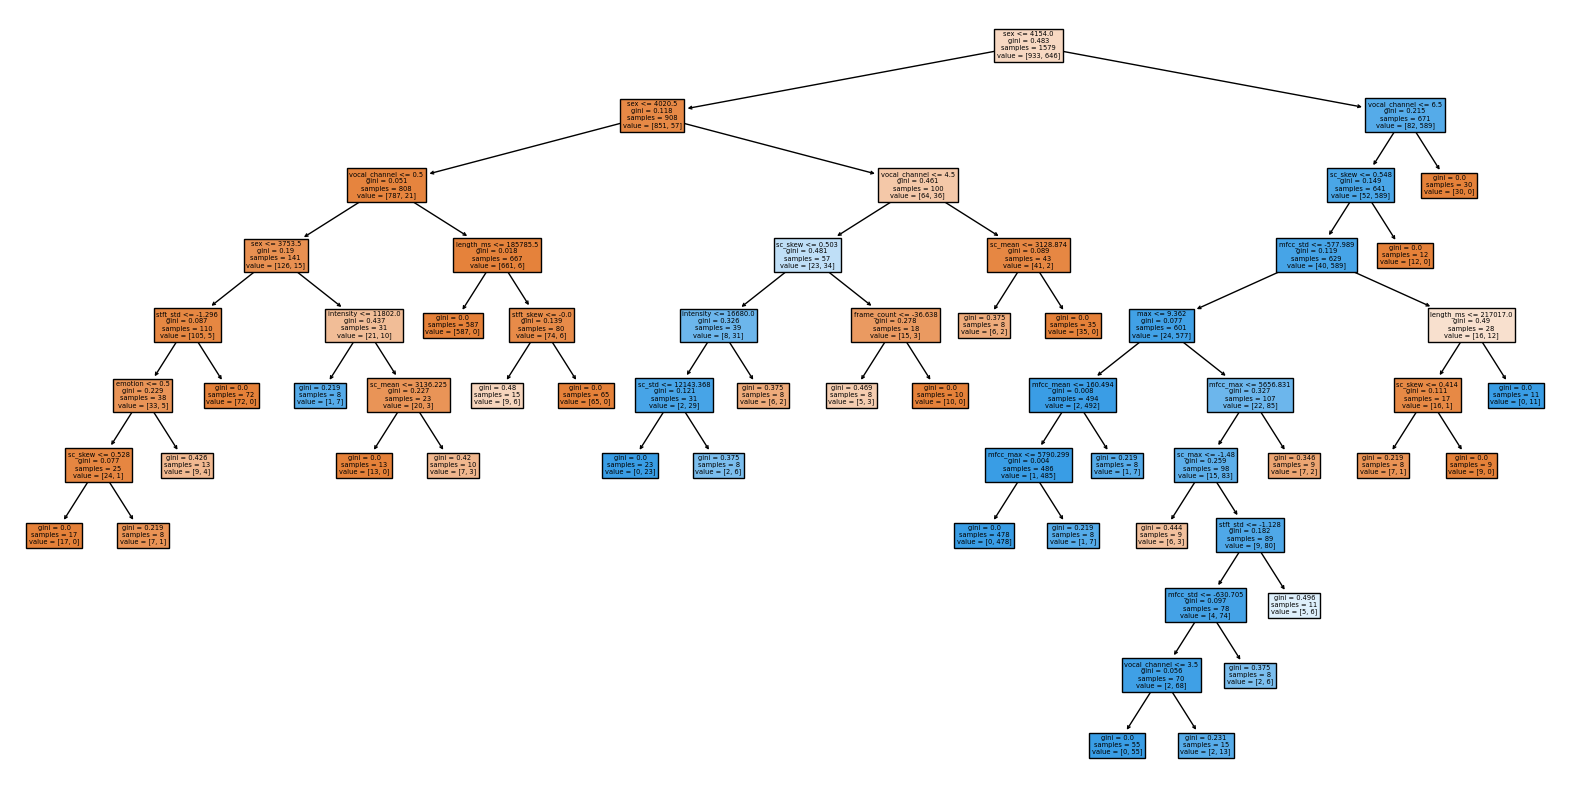

In [883]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=df_full_VC.columns, filled=True)
plt.show()

In [884]:
y_test_pred_VC = dt.predict(X_test_VC)
print(accuracy_score(Y_test_VC, y_test_pred_VC))
print(f1_score(Y_test_VC, y_test_pred_VC, average="macro"))

0.9527326440177253
0.9509518030827191


In [885]:
print(classification_report(Y_test_VC, y_test_pred_VC))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       402
         1.0       0.95      0.94      0.94       275

    accuracy                           0.95       677
   macro avg       0.95      0.95      0.95       677
weighted avg       0.95      0.95      0.95       677



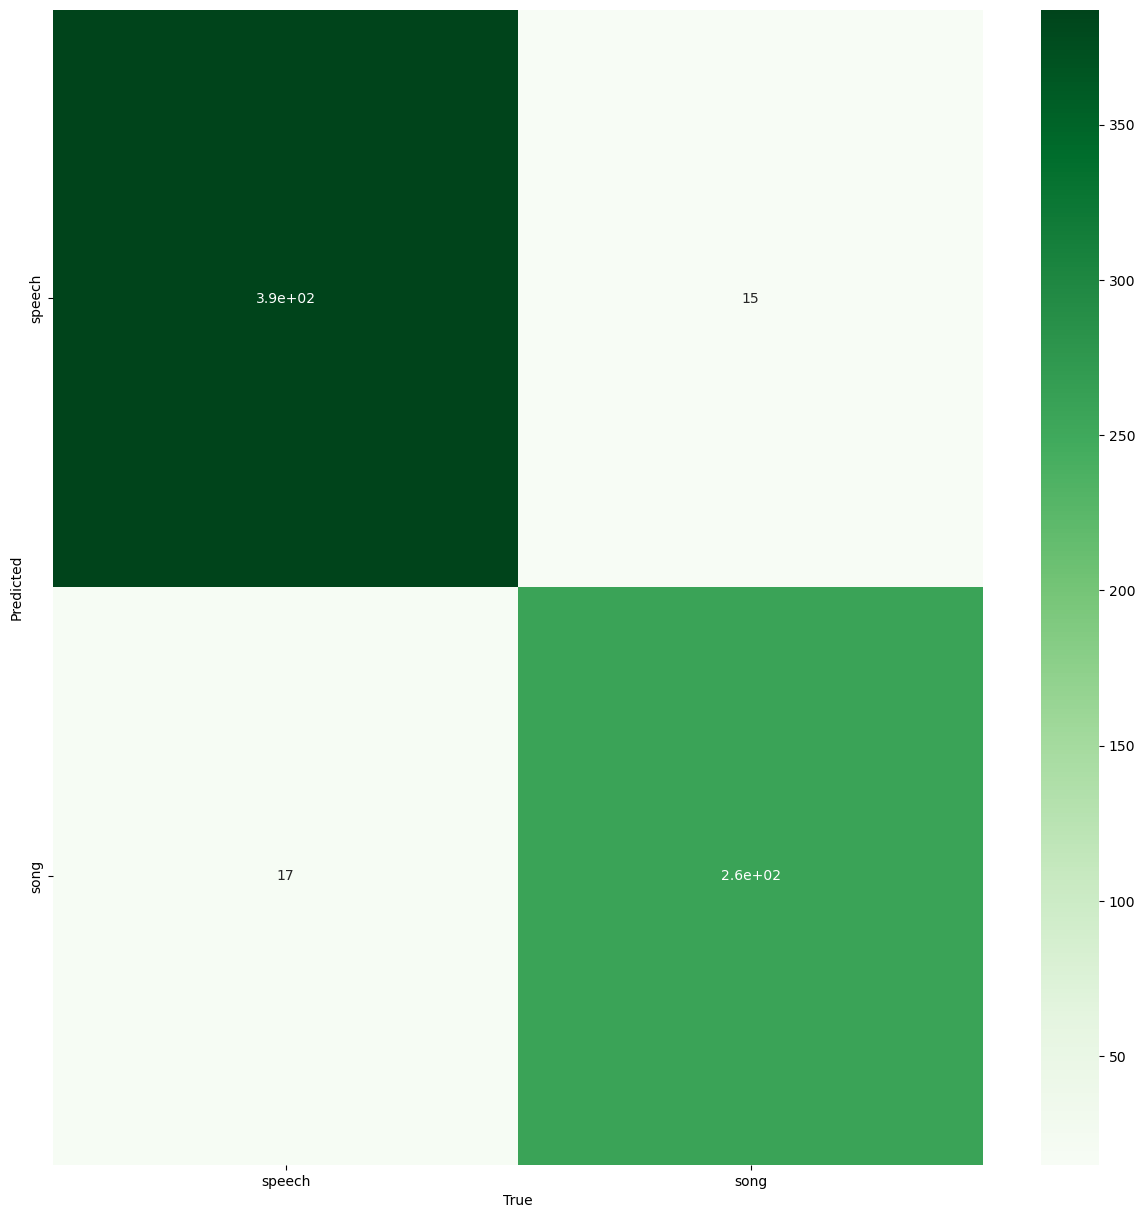

In [886]:
plt.figure(figsize=(15,15))
cf = confusion_matrix(Y_test_VC, y_test_pred_VC)
sns.heatmap(cf, annot=True, cmap="Greens", xticklabels = ["speech", "song"], yticklabels = ["speech", "song"])
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [887]:
y_test_pred_proba_VC = dt.predict_proba(X_test_VC)

<Figure size 700x700 with 0 Axes>

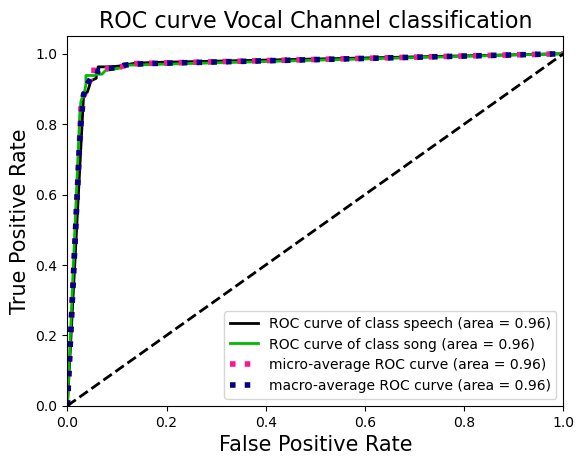

0.9654862053369516


In [888]:
plt.figure(figsize = (7,7))
plot_roc(Y_test_VC, dt.predict_proba(X_test_VC))
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)
plt.title("ROC curve Vocal Channel classification", fontsize = 16)
plt.legend(["ROC curve of class speech (area = 0.96)", "ROC curve of class song (area = 0.96)", "micro-average ROC curve (area = 0.96)", "macro-average ROC curve (area = 0.96)"])
plt.show()
print(roc_auc_score(Y_test_VC, y_test_pred_proba_VC[:,1], multi_class="ovr", average="macro"))

### riempio i valori NaN 

In [889]:
df_empty_VC = df_empty_VC.drop('vocal_channel', axis=1)
prediction = dt.predict(df_empty_VC)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [890]:
df_empty_VC.insert(0, 'vocal_channel', prediction)

In [891]:
frames = [df_full_VC, df_empty_VC]
df_final = pd.concat(frames)

In [892]:
df=df_final

In [893]:
df

,vocal_channel,emotion,emotional_intensity,statement,sex,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,...,stft_mean,stft_std,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,0.0,0,0,0,1,3737,179379.0,-36.793432,16995,-33.485947,...,0.415250,0.335533,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,0.0,1,0,0,1,3904,187387.0,-33.841674,13906,-29.502108,...,0.417488,0.352380,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
4,1.0,2,1,0,1,4404,211411.0,-31.214503,15137,-31.405996,...,0.415974,0.350655,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
5,0.0,0,0,0,1,3570,171371.0,-36.312244,12143,-30.500889,...,0.349669,0.345256,-1.098179,0.576157,2.519818e-07,0.015296,-0.122467,0.106171,12.775898,0.028186
6,0.0,1,0,0,1,3770,180980.0,-38.250586,14239,-30.177172,...,0.476312,0.346839,-1.425898,0.027192,-1.571576e-07,0.013860,-0.132965,0.148987,14.273623,0.011188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,0.0,1,0,1,1,4471,214614.0,-28.660473,16317,-27.718292,...,0.475615,0.333506,-1.323125,0.057277,8.375434e-07,0.036911,-0.319275,0.394623,15.339275,0.502938
2404,1.0,0,1,0,0,4137,198598.0,-28.697924,11180,-15.582778,...,0.493557,0.320842,-1.295628,0.135595,9.737080e-05,0.046922,-0.384827,0.432617,7.646659,-0.158904
2434,0.0,3,0,0,0,3070,147347.0,-43.668128,11775,-31.703947,...,0.614196,0.309952,-0.979552,-0.572825,-1.079062e-06,0.006333,-0.061554,0.069916,13.795441,-0.153631
2446,1.0,6,0,1,0,5005,240240.0,-36.811776,13981,-24.805220,...,0.466211,0.340911,-1.426536,0.174377,3.688684e-06,0.014458,-0.091187,0.090271,4.928123,0.227780


# Partitioning

In [894]:
y=np.array(df["emotion"])
df=df.drop(columns=["emotion"])
#categorical_columns=["vocal_channel", "emotional_intensity", "statement", "sex"]
#df = pd.get_dummies(df, columns=categorical_columns)
X = df.values
df.head()

,vocal_channel,emotional_intensity,statement,sex,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,...,stft_mean,stft_std,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,0.0,0,0,1,3737,179379.0,-36.793432,16995,-33.485947,134.654860,...,0.415250,0.335533,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,0.0,0,0,1,3904,187387.0,-33.841674,13906,-29.502108,130.485630,...,0.417488,0.352380,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
4,1.0,1,0,1,4404,211411.0,-31.214503,15137,-31.405996,122.125824,...,0.415974,0.350655,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
5,0.0,0,0,1,3570,171371.0,-36.312244,12143,-30.500889,132.581730,...,0.349669,0.345256,-1.098179,0.576157,2.519818e-07,0.015296,-0.122467,0.106171,12.775898,0.028186
6,0.0,0,0,1,3770,180980.0,-38.250586,14239,-30.177172,139.507460,...,0.476312,0.346839,-1.425898,0.027192,-1.571576e-07,0.013860,-0.132965,0.148987,14.273623,0.011188


In [895]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify = y, random_state=0
)

In [896]:
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.15334421 0.15334421 0.15334421 0.07830343 0.0766721  0.15334421
 0.15334421 0.07830343]
[0.1532634  0.1532634  0.1532634  0.07808858 0.07692308 0.1532634
 0.1532634  0.07867133]
[0.15353261 0.15353261 0.15353261 0.07880435 0.07608696 0.15353261
 0.15353261 0.07744565]


## Decision Tree

In [1000]:
#no parameters
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

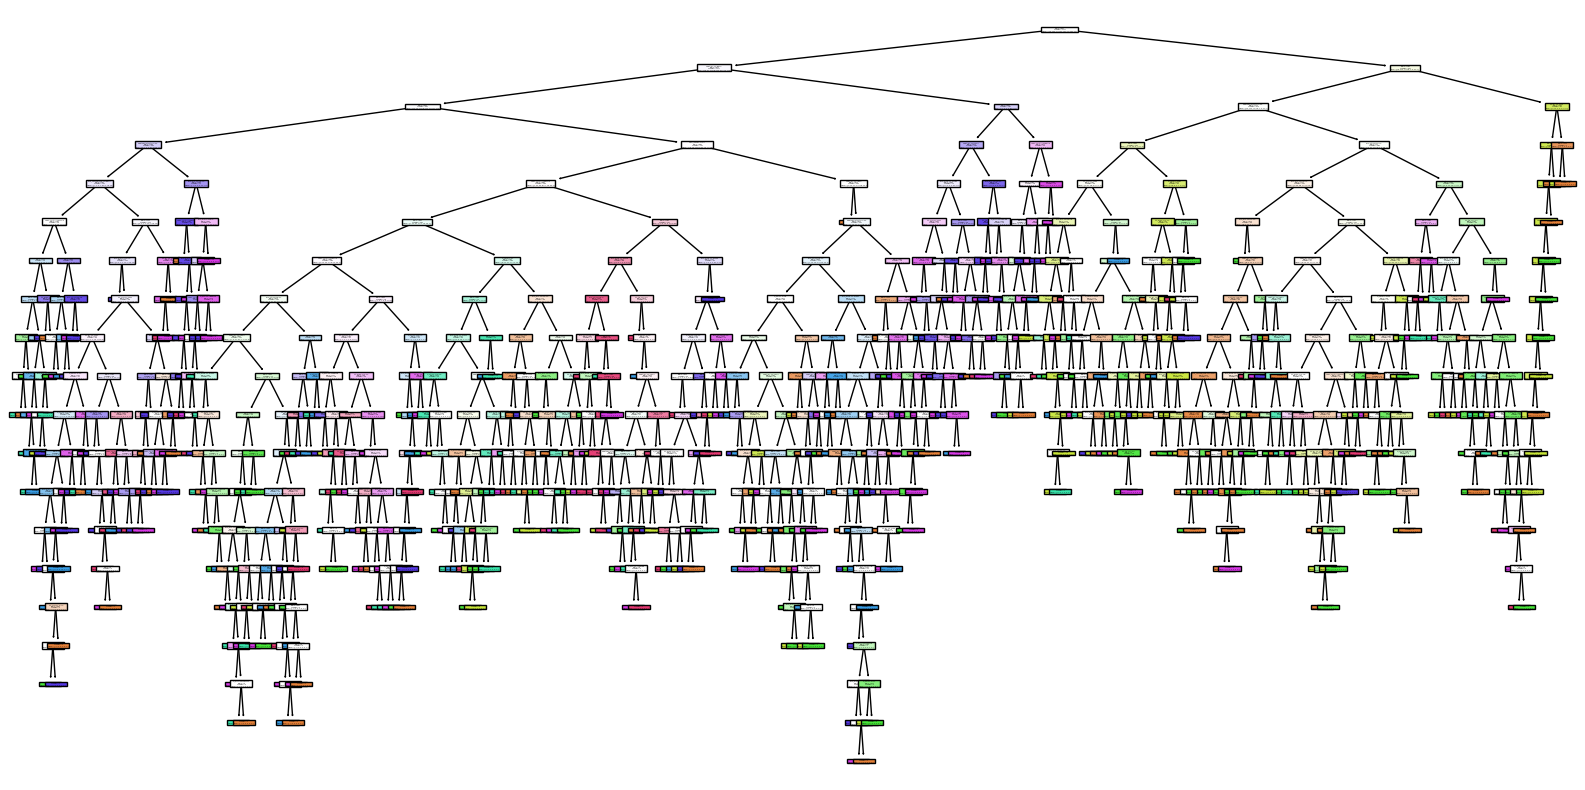

In [898]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=df.columns, filled=True)
plt.show()

In [960]:
y_test_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred, average="macro"))

0.3858695652173913
0.3701620797419672


In [961]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.35      0.35      0.35       113
           1       0.60      0.55      0.57       113
           2       0.34      0.34      0.34       113
           3       0.34      0.28      0.30        58
           4       0.34      0.29      0.31        56
           5       0.45      0.44      0.45       113
           6       0.32      0.41      0.36       113
           7       0.27      0.28      0.28        57

    accuracy                           0.39       736
   macro avg       0.38      0.37      0.37       736
weighted avg       0.39      0.39      0.39       736



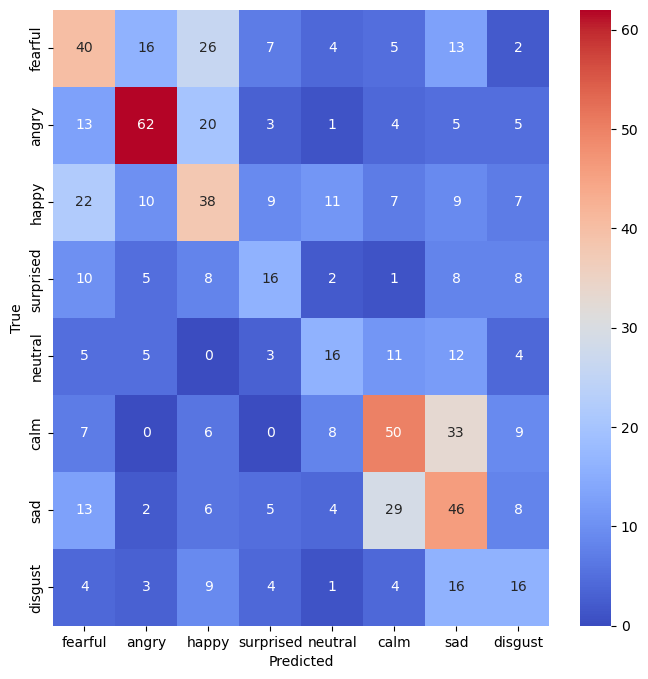

In [964]:
plt.figure(figsize=(8,8))
x_axis_labels = ["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"]
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, xticklabels=x_axis_labels, yticklabels=x_axis_labels, annot=True, cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

<Figure size 700x700 with 0 Axes>

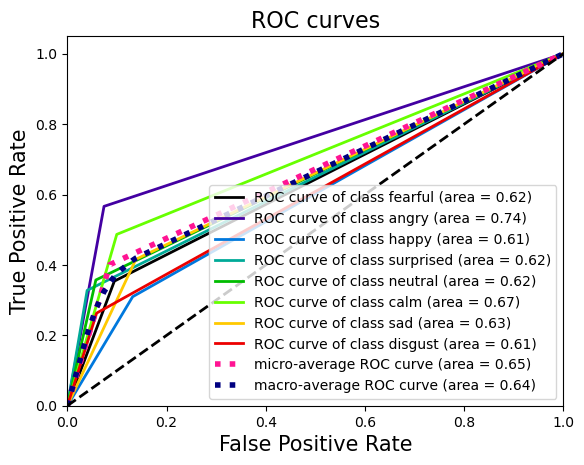

0.649176468957444


In [1002]:
plt.figure(figsize = (7,7))
plot_roc(y_test, dt.predict_proba(X_test))
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)
plt.title("ROC curves", fontsize = 16)
plt.legend(["ROC curve of class fearful (area = 0.62)", "ROC curve of class angry (area = 0.74)", "ROC curve of class happy (area = 0.61)",
            "ROC curve of class surprised (area = 0.62)", "ROC curve of class neutral (area = 0.62)", "ROC curve of class calm (area = 0.67)",
            "ROC curve of class sad (area = 0.63)", "ROC curve of class disgust (area = 0.61)", "micro-average ROC curve (area = 0.65)", "macro-average ROC curve (area = 0.64)"])
plt.show()

print(roc_auc_score(y_test, dt.predict_proba(X_test), multi_class="ovr", average="macro"))

## Cross validation

### Single parameter optimization

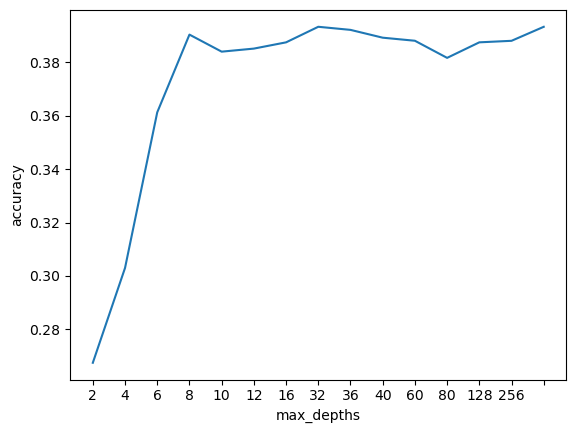

In [969]:
max_depths = [2, 4, 6, 8, 10, 12, 16, 32, 36, 40, 60, 80, 128, 256, None]
scores = list()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

In [906]:
scores

[0.2674774560987186,
 0.3024188080547834,
 0.3613041562139806,
 0.3915943453793477,
 0.38343786019391146,
 0.39509797274391484,
 0.39801172960878706,
 0.3851939114516239,
 0.3851888263611092,
 0.39218252084887106,
 0.39567597803240895,
 0.3956810631229236,
 0.38810258322598146,
 0.38228693470743774,
 0.392772391348566]

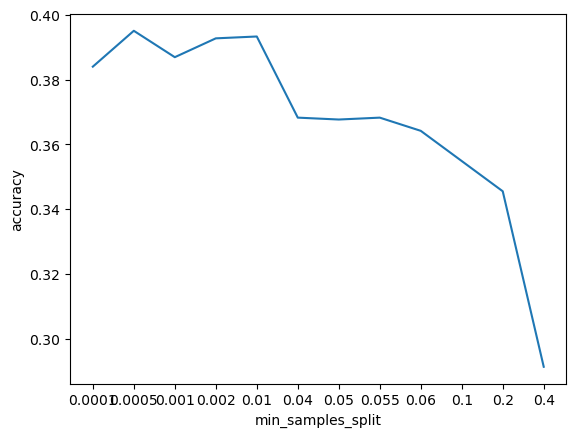

In [970]:
min_samples_splits = [ 0.0001, 0.0005, 0.001, 0.002, 0.01, 0.04, 0.05, 0.055, 0.06, 0.1, 0.2, 0.4]
scores = list()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

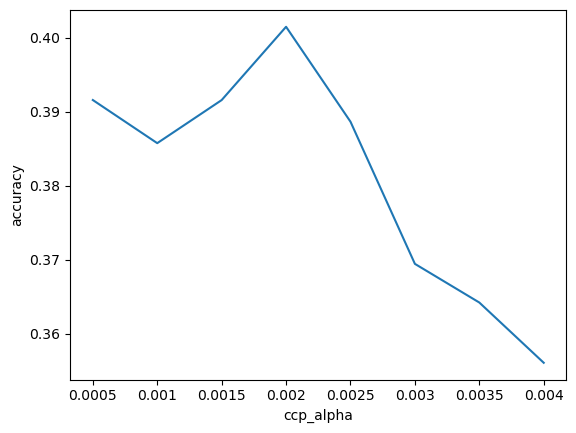

In [971]:
ccp_alphas = [0.0005 , 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004]
scores = list()
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(ccp_alphas)), ccp_alphas)
plt.xlabel("ccp_alpha")
plt.ylabel("accuracy")
plt.show()

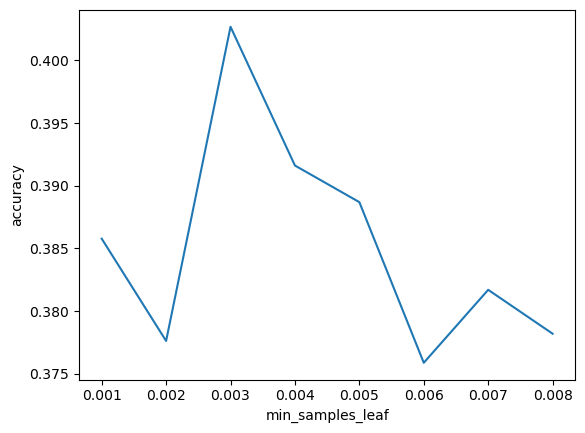

In [972]:
min_samples_leafs = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]
scores = list()
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

In [995]:
dt = DecisionTreeClassifier(max_depth=32, min_samples_split = 0.0005, ccp_alpha = 0.002, min_samples_leaf = 0.003)
scores = cross_val_score(dt, X_train, y_train, cv=5)
cross_val_score(dt, X_train, y_train, cv=5)

array([0.41860465, 0.37900875, 0.39650146, 0.3877551 , 0.39941691])

In [997]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, max_depth=32, min_samples_leaf=0.003,
                       min_samples_split=0.0005)

In [975]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.3939 (+/- 0.01)


In [976]:
cross_val_score(dt, X_test, y_test, cv=5).mean()

0.3424066924066924

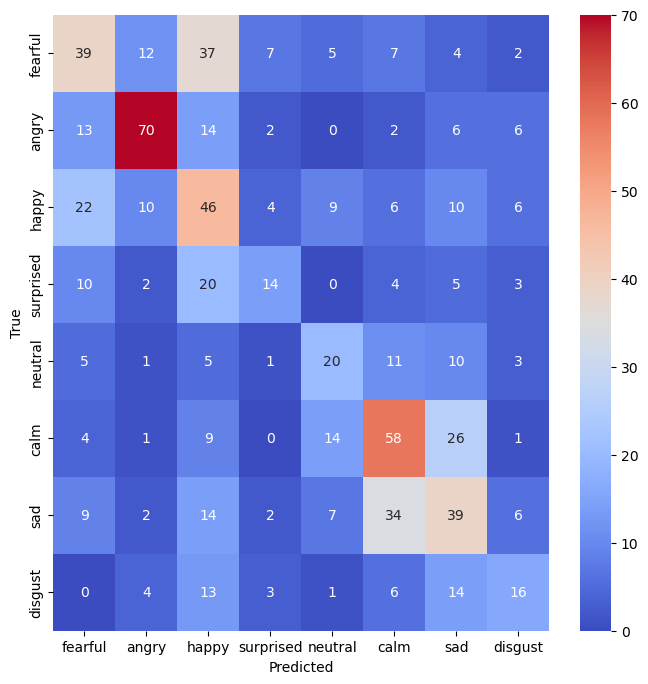

In [998]:
y_test_pred = dt.predict(X_test)

plt.figure(figsize=(8,8))
x_axis_labels = ["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"]
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, xticklabels=x_axis_labels, yticklabels=x_axis_labels, annot=True, cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

<Figure size 700x700 with 0 Axes>

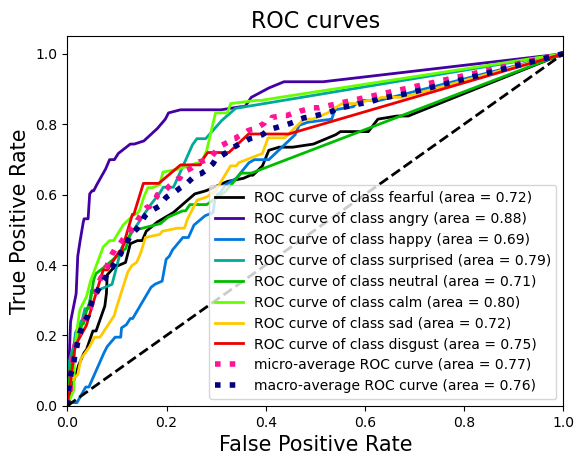

0.7748923279422415


In [999]:
plt.figure(figsize = (7,7))
plot_roc(y_test, dt.predict_proba(X_test))
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)
plt.title("ROC curves", fontsize = 16)
plt.legend(["ROC curve of class fearful (area = 0.72)", "ROC curve of class angry (area = 0.88)", "ROC curve of class happy (area = 0.69)",
            "ROC curve of class surprised (area = 0.79)", "ROC curve of class neutral (area = 0.71)", "ROC curve of class calm (area = 0.80)",
            "ROC curve of class sad (area = 0.72)", "ROC curve of class disgust (area = 0.75)", "micro-average ROC curve (area = 0.77)", "macro-average ROC curve (area = 0.76)"])
plt.show()

print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

### RandomizedSearchCV

In [916]:
'''
param_grid = {
    "min_samples_split": uniform(0.0005,0.0003),
    "min_samples_leaf": uniform(0.004, 0.001),
    "max_depth": randint(2, 150),
    "criterion": ["gini", "entropy", "log_loss"],
    #"min_weight_fraction_leaf" : uniform(0.0001, 1e0),
    #"max_leaf_nodes" : randint(80, 140),
    #"min_impurity_decrease" : uniform(0.0001, 1e0),
    "ccp_alpha" : uniform(0.002, 0.0005)
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=500,
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_
'''

'\nparam_grid = {\n    "min_samples_split": uniform(0.0005,0.0003),\n    "min_samples_leaf": uniform(0.004, 0.001),\n    "max_depth": randint(2, 150),\n    "criterion": ["gini", "entropy", "log_loss"],\n    #"min_weight_fraction_leaf" : uniform(0.0001, 1e0),\n    #"max_leaf_nodes" : randint(80, 140),\n    #"min_impurity_decrease" : uniform(0.0001, 1e0),\n    "ccp_alpha" : uniform(0.002, 0.0005)\n}\ngrid = RandomizedSearchCV(\n    DecisionTreeClassifier(),\n    param_distributions=param_grid,\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=-1,\n    n_iter=500,\n)\ngrid.fit(X_train, y_train)\nclf = grid.best_estimator_\n'

In [917]:
#print(grid.best_params_, grid.best_score_)

{'ccp_alpha': 0.0021162325728645757, 'criterion': 'gini', 'max_depth': 110, 'min_samples_leaf': 0.004115068214946628, 'min_samples_split': 0.0006716487493238152} 0.38572276086514345


In [981]:
dt = DecisionTreeClassifier(ccp_alpha = 0.0021162325728645757, criterion = "gini", max_depth = 110, 
                            min_samples_leaf = 0.004115068214946628, min_samples_split = 0.0006716487493238152, class_weight = "balanced")
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0021162325728645757, class_weight='balanced',
                       max_depth=110, min_samples_leaf=0.004115068214946628,
                       min_samples_split=0.0006716487493238152)

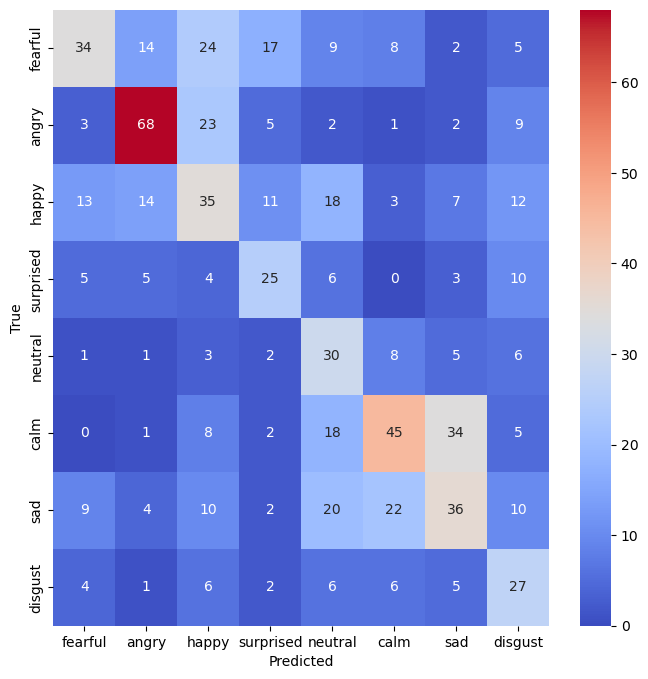

In [982]:
y_test_pred = dt.predict(X_test)

plt.figure(figsize=(8,8))
x_axis_labels = ["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"]
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, xticklabels=x_axis_labels, yticklabels=x_axis_labels, annot=True, cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [983]:
y_test_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred, average="macro"))

0.4076086956521739
0.40416321082719675


In [987]:
scores = cross_val_score(dt, X_train, y_train, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.3776 (+/- 0.01)


In [988]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.49      0.30      0.37       113
           1       0.63      0.60      0.62       113
           2       0.31      0.31      0.31       113
           3       0.38      0.43      0.40        58
           4       0.28      0.54      0.36        56
           5       0.48      0.40      0.44       113
           6       0.38      0.32      0.35       113
           7       0.32      0.47      0.38        57

    accuracy                           0.41       736
   macro avg       0.41      0.42      0.40       736
weighted avg       0.43      0.41      0.41       736



In [989]:
cross_val_score(dt, X_test, y_test, cv=5).mean()

0.38863761720904577

<Figure size 700x700 with 0 Axes>

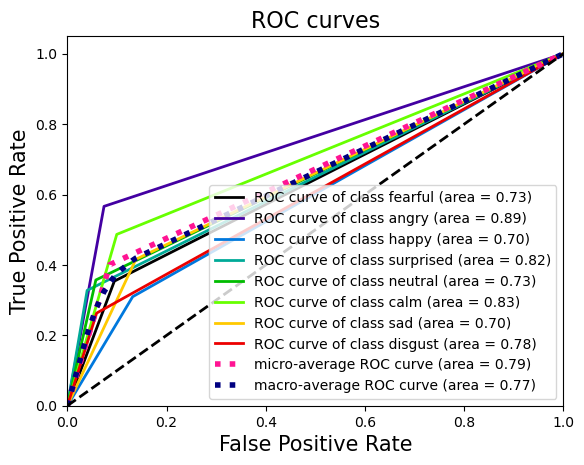

0.649176468957444


In [1006]:
plt.figure(figsize = (7,7))
plot_roc(y_test, dt.predict_proba(X_test))
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)
plt.title("ROC curves", fontsize = 16)
plt.legend(["ROC curve of class fearful (area = 0.73)", "ROC curve of class angry (area = 0.89)", "ROC curve of class happy (area = 0.70)",
            "ROC curve of class surprised (area = 0.82)", "ROC curve of class neutral (area = 0.73)", "ROC curve of class calm (area = 0.83)",
            "ROC curve of class sad (area = 0.70)", "ROC curve of class disgust (area = 0.78)", "micro-average ROC curve (area = 0.79)", "macro-average ROC curve (area = 0.77)"])
plt.show()

print(roc_auc_score(y_test, dt.predict_proba(X_test), multi_class="ovr", average="macro"))

### GridsearchCV

param_grid = {
    "min_samples_split": [0.002, 0.01, 0.04, 0.05, 0.1],
    "min_samples_leaf": [0.0005 ,0.002, 0.003, 0.01, 0.05],
    "max_depth": [4, 6, 8, 10, 12, 14, 16],
    "ccp_alpha" : [0.0005 , 0.001, 0.0015, 0.002, 0.0025, 0.003],
    "class_weight": ["balanced", None],

}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    refit=True,
)

grid.fit(X_train, y_train)

clf = grid.best_estimator_

print(grid.best_params_, grid.best_score_)

clf.score(X_test, y_test)

dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=0.002, min_samples_split=0.002, class_weight="balanced", ccp_alpha = 0.0015)
dt.fit(X_train, y_train)

plt.figure(figsize=(20, 10), dpi=500)
plot_tree(dt, feature_names=df.columns, filled=True)
plt.show()

y_test_pred = dt.predict(X_test)

plt.figure(figsize=(15,15))
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, y_test_pred))

y_test_pred_proba = dt.predict_proba(X_test)
plot_roc(y_test, dt.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

## KNN

In [925]:
#Scaling only on training set for entropy reasons
norm = StandardScaler()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [926]:
clf = KNeighborsClassifier(n_neighbors=40, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=40)

In [927]:
clf.score(X_test_norm, y_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.38858695652173914

In [928]:
cross_val_score(clf, X_test_norm, y_test, cv=5).mean()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.3423607280750137

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

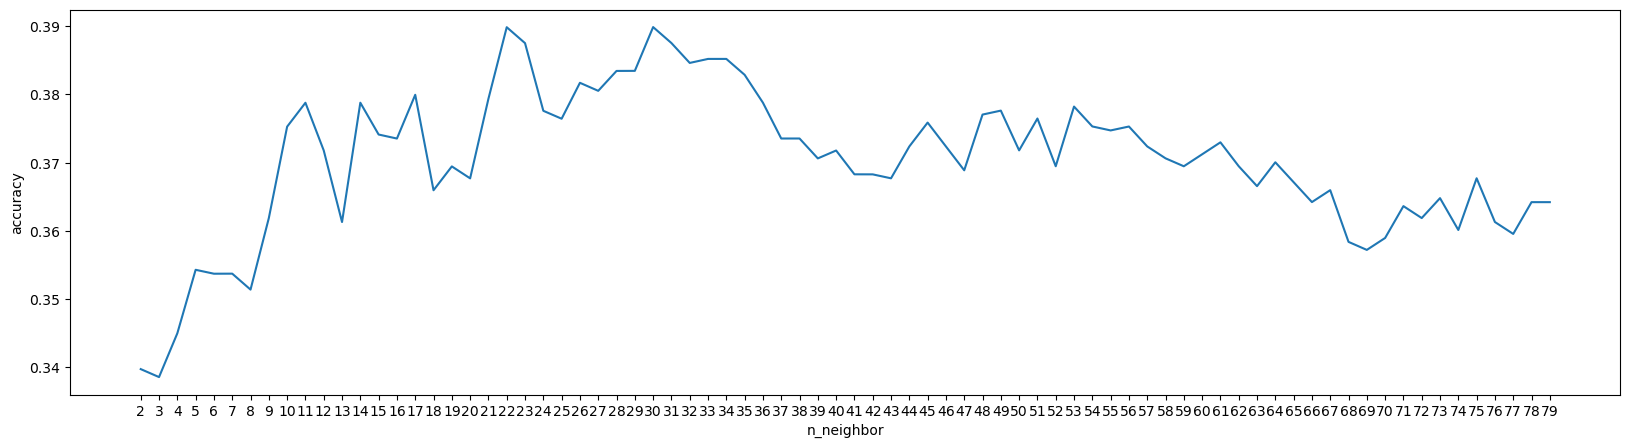

In [1003]:
plt.figure(figsize=(20,5))
neighbors = np.arange(2, 80, 1)
scores = list()
for neighbor in neighbors:
    clf = KNeighborsClassifier(n_neighbors=neighbor)
    scores.append(cross_val_score(clf, X_train_norm, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(neighbors)), neighbors)
plt.xlabel("n_neighbor")
plt.ylabel("accuracy")
plt.show()

In [931]:
'''
param_grid = {
    "n_neighbors": randint(12,60),
    "weights": ["uniform", "distance"],
    "metric": ["manhattan", "euclidean", "minkowski"]
}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter = 50,
)
grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_
'''

'\nparam_grid = {\n    "n_neighbors": randint(12,60),\n    "weights": ["uniform", "distance"],\n    "metric": ["manhattan", "euclidean", "minkowski"]\n}\n\ngrid = RandomizedSearchCV(\n    KNeighborsClassifier(),\n    param_distributions=param_grid,\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=-1,\n    n_iter = 50,\n)\ngrid.fit(X_train_norm, y_train)\nclf = grid.best_estimator_\n'

In [932]:
#print(grid.best_params_, grid.best_score_)

In [933]:
#clf.score(X_test_norm, y_test)

In [1007]:
clf = KNeighborsClassifier(n_neighbors=22, metric="manhattan", weights="distance")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=22, weights='distance')

In [1008]:
y_test_pred = dt.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.40      0.35      0.38       113
           1       0.58      0.57      0.57       113
           2       0.30      0.31      0.30       113
           3       0.41      0.33      0.37        58
           4       0.34      0.36      0.35        56
           5       0.47      0.49      0.48       113
           6       0.35      0.42      0.38       113
           7       0.27      0.26      0.27        57

    accuracy                           0.40       736
   macro avg       0.39      0.39      0.39       736
weighted avg       0.40      0.40      0.40       736



<Figure size 700x700 with 0 Axes>

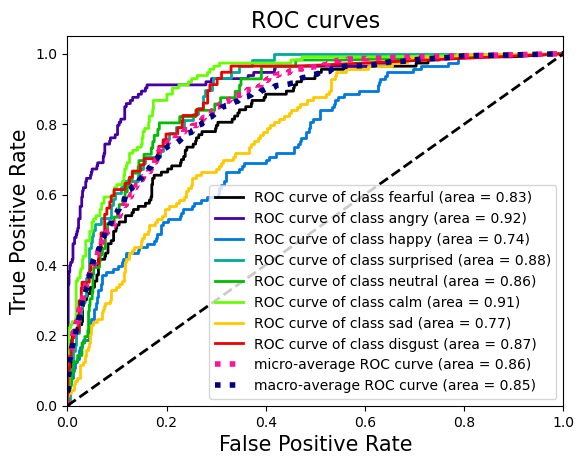

0.8493850488596275


In [1011]:
plt.figure(figsize = (7,7))
plot_roc(y_test, clf.predict_proba(X_test_norm))
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)
plt.title("ROC curves", fontsize = 16)
plt.legend(["ROC curve of class fearful (area = 0.83)", "ROC curve of class angry (area = 0.92)", "ROC curve of class happy (area = 0.74)",
            "ROC curve of class surprised (area = 0.88)", "ROC curve of class neutral (area = 0.86)", "ROC curve of class calm (area = 0.91)",
            "ROC curve of class sad (area = 0.77)", "ROC curve of class disgust (area = 0.87)", "micro-average ROC curve (area = 0.86)", "macro-average ROC curve (area = 0.85)"])
plt.show()

print(roc_auc_score(y_test, clf.predict_proba(X_test_norm), multi_class="ovr", average="macro"))

In [1012]:
clf.score(X_test_norm, y_test)

0.46195652173913043

In [1013]:
cross_val_score(clf, X_test_norm, y_test, cv=5).mean()

0.36276889134031987

## Naive-Bayes

### Gaussian

In [1018]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [1019]:
y_pred = clf.predict(X_test)

In [1020]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.11      0.18       113
           1       0.51      0.48      0.49       113
           2       0.37      0.12      0.18       113
           3       0.00      0.00      0.00        58
           4       1.00      0.02      0.04        56
           5       0.59      0.19      0.29       113
           6       0.43      0.14      0.21       113
           7       0.10      0.86      0.18        57

    accuracy                           0.23       736
   macro avg       0.45      0.24      0.20       736
weighted avg       0.47      0.23      0.22       736



<Figure size 700x700 with 0 Axes>

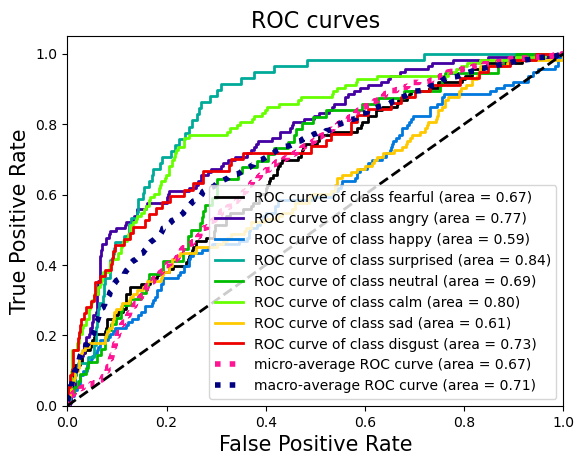

In [1023]:
plt.figure(figsize = (7,7))
plot_roc(y_test, clf.predict_proba(X_test))
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)
plt.title("ROC curves", fontsize = 16)
plt.legend(["ROC curve of class fearful (area = 0.67)", "ROC curve of class angry (area = 0.77)", "ROC curve of class happy (area = 0.59)",
            "ROC curve of class surprised (area = 0.84)", "ROC curve of class neutral (area = 0.69)", "ROC curve of class calm (area = 0.80)",
            "ROC curve of class sad (area = 0.61)", "ROC curve of class disgust (area = 0.73)", "micro-average ROC curve (area = 0.67)", "macro-average ROC curve (area = 0.71)"])
plt.show()

print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

### Categorical NB

In [1024]:
non_cat_columns = [
    "length_ms",
    "frame_count",
    "intensity",
    "zero_crossings_sum",
    "mfcc_mean",
    "mfcc_std",
    "mfcc_min",
    "mfcc_max",
    "sc_mean",
    "sc_std",
    "sc_max",
    "sc_kur",
    "sc_skew",
    "stft_mean",
    "stft_std",
    "stft_kur",
    "stft_skew",
    "mean",
    "std",
    "max",
    "min",
    "kur",
    "skew"
]

X_noncat = df[non_cat_columns].values

X_train_noncat, X_test_noncat, y_train_noncat, y_test_noncat = train_test_split(
    X_noncat, y, test_size=0.3, stratify=y, random_state=0
)

# train and test set should be binned separately
X_train_cat = list()
for column_idx in range(X_train_noncat.shape[1]):
    X_train_cat.append(pd.qcut(X_train_noncat[:, column_idx], q=4, labels=False))
X_train_cat = np.array(X_train_cat).T

X_test_cat = list()
for column_idx in range(X_test_noncat.shape[1]):
    X_test_cat.append(pd.qcut(X_test_noncat[:, column_idx], q=4, labels=False))
X_test_cat = np.array(X_test_cat).T

print(X_train_cat.shape, X_test_cat.shape)

(1716, 23) (736, 23)


In [1025]:
clf = CategoricalNB()
clf.fit(X_train_cat, y_train_noncat)

CategoricalNB()

In [1026]:
y_pred = clf.predict(X_test_cat)

In [1027]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.07      0.12       113
           1       0.40      0.64      0.49       113
           2       0.28      0.29      0.28       113
           3       0.24      0.40      0.30        58
           4       0.22      0.25      0.23        56
           5       0.44      0.49      0.46       113
           6       0.29      0.15      0.20       113
           7       0.28      0.37      0.32        57

    accuracy                           0.33       736
   macro avg       0.32      0.33      0.30       736
weighted avg       0.34      0.33      0.31       736



<Figure size 700x700 with 0 Axes>

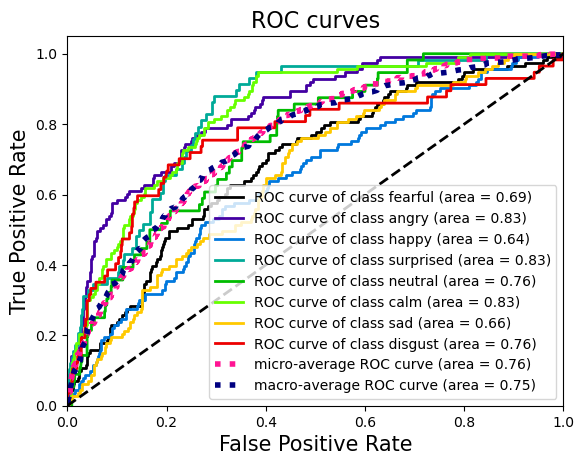

0.7509812059009472


In [1031]:
plt.figure(figsize = (7,7))
plot_roc(y_test, clf.predict_proba(X_test_cat))
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)
plt.title("ROC curves", fontsize = 16)
plt.legend(["ROC curve of class fearful (area = 0.69)", "ROC curve of class angry (area = 0.83)", "ROC curve of class happy (area = 0.64)",
            "ROC curve of class surprised (area = 0.83)", "ROC curve of class neutral (area = 0.76)", "ROC curve of class calm (area = 0.83)",
            "ROC curve of class sad (area = 0.66)", "ROC curve of class disgust (area = 0.76)", "micro-average ROC curve (area = 0.76)", "macro-average ROC curve (area = 0.75)"])
plt.show()

print(roc_auc_score(y_test, clf.predict_proba(X_test_cat), multi_class="ovr", average="macro"))

### Mixed NB

https://github.com/remykarem/mixed-naive-bayes

In [948]:
df.head()

,vocal_channel,emotional_intensity,statement,sex,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,...,stft_mean,stft_std,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,0.0,0,0,1,3737,179379.0,-36.793432,16995,-33.485947,134.654860,...,0.415250,0.335533,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,0.0,0,0,1,3904,187387.0,-33.841674,13906,-29.502108,130.485630,...,0.417488,0.352380,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
4,1.0,1,0,1,4404,211411.0,-31.214503,15137,-31.405996,122.125824,...,0.415974,0.350655,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
5,0.0,0,0,1,3570,171371.0,-36.312244,12143,-30.500889,132.581730,...,0.349669,0.345256,-1.098179,0.576157,2.519818e-07,0.015296,-0.122467,0.106171,12.775898,0.028186
6,0.0,0,0,1,3770,180980.0,-38.250586,14239,-30.177172,139.507460,...,0.476312,0.346839,-1.425898,0.027192,-1.571576e-07,0.013860,-0.132965,0.148987,14.273623,0.011188


In [1032]:
clf = MixedNB(categorical_features=[0,1,2,3])

In [1033]:
clf.fit(X_train,y_train)

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [1034]:
y_pred = clf.predict(X_test)

In [1035]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.15      0.23       113
           1       0.51      0.49      0.50       113
           2       0.37      0.21      0.27       113
           3       0.00      0.00      0.00        58
           4       0.25      0.04      0.06        56
           5       0.61      0.19      0.30       113
           6       0.30      0.19      0.24       113
           7       0.12      0.86      0.21        57

    accuracy                           0.26       736
   macro avg       0.34      0.27      0.23       736
weighted avg       0.38      0.26      0.26       736



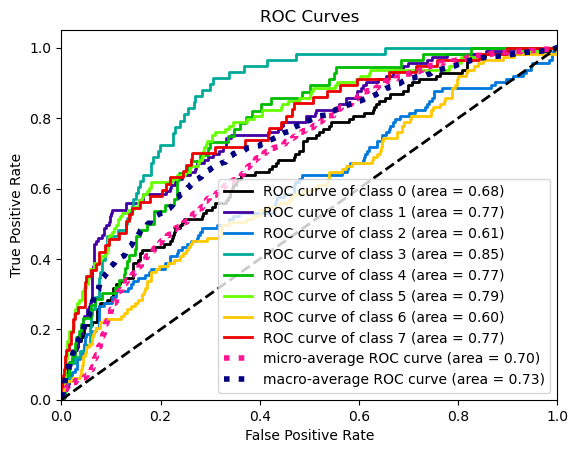

0.7303640187351332


In [1036]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))